In [290]:
# from census import Census
# from us import states

import requests
import pandas as pd
import numpy as np

from __future__ import print_function, division
import matplotlib.pylab as pl
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set_style('whitegrid')
import json
import geopandas as gpd
import fiona
import shapely

import statsmodels.formula.api as smf
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data (shapefiles)
- CSAs
- Counties within CSA's
- Places (main cities) within CSA's

### CSA's

In [291]:
CSAs = gpd.GeoDataFrame.from_file('../rp-USmetros_comparison/data/MajorMetro_CSAs_NYC Metro/MajorMetro_CSAs_NYC Metro.shp')

CSAs['CSA_short'] = CSAs['NAMELSAD'].str.split('-').str[0]
CSAs['CSA_short'] = CSAs['CSA_short'].replace(['San Jose'], ['SFSJ']) 

CSAs = CSAs.set_index('GEOID')

print(CSAs.shape)
print(CSAs.crs)
CSAs.head()

(15, 12)
{'init': 'epsg:4269'}


NAMELSAD LSAD         ALAND  \
GEOID                                                                         
122    Atlanta--Athens-Clarke County--Sandy Springs, ...   M0  3.067861e+10   
148         Boston-Worcester-Providence, MA-RI-NH-CT CSA   M0  2.512644e+10   
176                     Chicago-Naperville, IL-IN-WI CSA   M0  2.754528e+10   
206                         Dallas-Fort Worth, TX-OK CSA   M0  4.269566e+10   
216                                Denver-Aurora, CO CSA   M0  3.382046e+10   

             AWATER     INTPTLAT      INTPTLON  OBJECTID  Shape_Leng  \
GEOID                                                                  
122    6.259976e+08  +33.7367725   -84.3069871         6   10.252350   
148    7.172326e+09  +42.3619187   -71.2724983        13   19.477631   
176    6.298296e+09  +41.6992296   -88.0040867        23   11.095250   
206    1.772163e+09  +32.9421299   -96.8323426        34   14.767164   
216    2.636014e+08  +39.8155108  -104.7708866        37   12.049017   

       Shape_Area     ALAND_mi  \
GEOID                            
122      3.045510  11845.07402   
148      2.899277   9701.36925   
176      3.016180  10635.28824   
206      4.287351  16484.87986   
216      3.585039  13058.14675   

                                                geometry CSA_short  
GEOID                                                               
122    POLYGON ((-84.65452299973663 34.58318700008004...   Atlanta  
148    (POLYGON ((-71.57030099989117 41.2253420000333...    Boston  
176    POLYGON ((-87.80585589123638 42.66788896010746...   Chicago  
206    POLYGON ((-95.44916499996475 32.35523300050261...    Dallas  
216    POLYGON ((-105.3291339998342 38.69720499981094...    Denver

In [292]:
list(CSAs.CSA_short)

['Atlanta',
 'Boston',
 'Chicago',
 'Dallas',
 'Denver',
 'Detroit',
 'Houston',
 'Los Angeles',
 'Miami',
 'Minneapolis',
 'Philadelphia',
 'SFSJ',
 'Seattle',
 'Washington',
 'NYC Metropolitan Region (DCP']

### Counties

In [293]:
Counties = gpd.GeoDataFrame.from_file('../rp-USmetros_comparison/data/MM_County_CSA-NYMetro/MM_County_CSA-NYMetro.shp')

Counties['STATEFP'] = Counties['STATEFP'].apply(lambda x: '{0:0>2}'.format(x))
Counties['COUNTYFP'] = Counties['COUNTYFP'].apply(lambda x: '{0:0>3}'.format(x))
Counties['STCO'] = Counties[['STATEFP', 'COUNTYFP']].apply(lambda x: ''.join(x), axis=1)

print(Counties.shape)
print(Counties.crs)
Counties.head()

(275, 24)
{'init': 'epsg:4269'}


OBJECTID STATEFP COUNTYFP  COUNTYNS  GEOID      NAME         NAMELSAD LSAD  \
0        50      51      179  01480173  51179  Stafford  Stafford County   06   
1        52      18      073  00450494  18073    Jasper    Jasper County   06   
2        54      13      171  00326713  13171     Lamar     Lamar County   06   
3        62      25      025  00606939  25025   Suffolk   Suffolk County   06   
4        69      48      147  01383859  48147    Fannin    Fannin County   06   

  CLASSFP  MTFCC  ...           ALAND       AWATER     INTPTLAT      INTPTLON  \
0      H1  G4020  ...    6.972372e+08   28088013.0  +38.4153998  -077.4548785   
1      H1  G4020  ...    1.449423e+09    4569484.0  +41.0176883  -087.1188137   
2      H1  G4020  ...    4.752628e+08    6046030.0  +33.0744605  -084.1467208   
3      H4  G4020  ...    1.508555e+08  160479920.0  +42.3385513  -071.0182530   
4      H1  G4020  ...    2.307251e+09   20847063.0  +33.5911611  -096.1049882   

   Shape_Leng  Shape_Area  CSA   ALAND_mi  \
0    1.430305    0.074492  548  269.20469   
1    1.712039    0.155669  176  559.62509   
2    1.012445    0.046478  122  183.49991   
3    1.473513    0.018754  148   58.24560   
4    2.281024    0.226131  206  890.83420   

                                            geometry   STCO  
0  POLYGON ((-77.29936158217123 38.51150278002933...  51179  
1  POLYGON ((-86.93007900014572 41.23679800042743...  18073  
2  POLYGON ((-84.04149800013255 33.2026290001283,...  13171  
3  (POLYGON ((-70.954286600746 42.30865283436088,...  25025  
4  POLYGON ((-95.8465360002362 33.83985499970851,...  48147  

[5 rows x 24 columns]

In [294]:
list(Counties.columns)

['OBJECTID',
 'STATEFP',
 'COUNTYFP',
 'COUNTYNS',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'LSAD',
 'CLASSFP',
 'MTFCC',
 'CSAFP',
 'CBSAFP',
 'METDIVFP',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'Shape_Leng',
 'Shape_Area',
 'CSA',
 'ALAND_mi',
 'geometry',
 'STCO']

In [295]:
print(len(Counties[Counties['CSA'] == '408']))
Counties[Counties['CSA'] == '408'].set_index('NAME')

31


OBJECTID STATEFP COUNTYFP  COUNTYNS  GEOID            NAMELSAD  \
NAME                                                                          
Sussex            112      34      037  00882236  34037       Sussex County   
Ulster            212      36      111  00974153  36111       Ulster County   
Suffolk           445      36      103  00974149  36103      Suffolk County   
Union             477      34      039  00882235  34039        Union County   
Dutchess          545      36      027  00974112  36027     Dutchess County   
Nassau           1016      36      059  00974128  36059       Nassau County   
Middlesex        1038      34      023  00882230  34023    Middlesex County   
Westchester      1134      36      119  00974157  36119  Westchester County   
New Haven        1139      09      009  00212798  09009    New Haven County   
Hudson           1347      34      017  00882278  34017       Hudson County   
Richmond         1400      36      085  00974141  36085     Richmond County   
Putnam           1517      36      079  00974138  36079       Putnam County   
Monmouth         1603      34      025  00882910  34025     Monmouth County   
Somerset         1692      34      035  00882234  34035     Somerset County   
Ocean            1740      34      029  00882279  34029        Ocean County   
Sullivan         1761      36      105  00974150  36105     Sullivan County   
Fairfield        2049      09      001  00212794  09001    Fairfield County   
Litchfield       2201      09      005  00212796  09005   Litchfield County   
Morris           2223      34      027  00882231  34027       Morris County   
Essex            2268      34      013  00882276  34013        Essex County   
Queens           2334      36      081  00974139  36081       Queens County   
Bergen           2376      34      003  00882271  34003       Bergen County   
Kings            2410      36      047  00974122  36047        Kings County   
New York         2447      36      061  00974129  36061     New York County   
Warren           2452      34      041  00882237  34041       Warren County   
Passaic          2669      34      031  00882232  34031      Passaic County   
Rockland         2837      36      087  00974142  36087     Rockland County   
Hunterdon        2912      34      019  00882228  34019    Hunterdon County   
Orange           3156      36      071  00974134  36071       Orange County   
Bronx            3163      36      005  00974101  36005        Bronx County   
Mercer           3204      34      021  00882229  34021       Mercer County   

            LSAD CLASSFP  MTFCC CSAFP  ...           ALAND        AWATER  \
NAME                                   ...                                 
Sussex        06      H1  G4020   408  ...    1.343553e+09  4.323473e+07   
Ulster        06      H1  G4020   408  ...    2.911758e+09  9.459695e+07   
Suffolk       06      H1  G4020   408  ...    2.360846e+09  3.785547e+09   
Union         06      H1  G4020   408  ...    2.661707e+08  7.046286e+06   
Dutchess      06      H1  G4020   408  ...    2.060678e+09  7.695628e+07   
Nassau        06      H1  G4020   408  ...    7.371910e+08  4.372827e+08   
Middlesex     06      H1  G4020   408  ...    8.008576e+08  3.547265e+07   
Westchester   06      H1  G4020   408  ...    1.115031e+09  1.799491e+08   
New Haven     06      H4  G4020   408  ...    1.565654e+09  6.670923e+08   
Hudson        06      H1  G4020   408  ...    1.197647e+08  4.183480e+07   
Richmond      06      H6  G4020   408  ...    1.489727e+08  1.159527e+08   
Putnam        06      H1  G4020   408  ...    5.965042e+08  4.128280e+07   
Monmouth      06      H1  G4020   408  ...    1.213128e+09  5.104445e+08   
Somerset      06      H1  G4020   408  ...    7.818162e+08  8.009303e+06   
Ocean         06      H1  G4020   408  ...    1.628663e+09  7.407516e+08   
Sullivan      06      H1  G4020        ...    2.507463e+09  7.403501e+07   
Fairfield     06      H4  G4020   408

In [296]:
Counties_df = Counties[['STCO', 'NAMELSAD', 'CSA']]

print(Counties_df.shape)
Counties_df.head()

(275, 3)


STCO         NAMELSAD  CSA
0  51179  Stafford County  548
1  18073    Jasper County  176
2  13171     Lamar County  122
3  25025   Suffolk County  148
4  48147    Fannin County  206

In [297]:
# exporting as .csv 
Counties_df.to_csv("exports/USmetros_COUNTIESraw.csv")

### Places

In [298]:
Places = gpd.GeoDataFrame.from_file('../rp-USmetros_comparison/data/MM_Places_City/MM_Places_City_clip.shp')

print(Places.shape)
print(Places.crs)
Places.head()

(19, 19)
{'init': 'epsg:4269'}


STATEFP PLACEFP   PLACENS    GEOID           NAME            NAMELSAD LSAD  \
0      06   44000  02410877  0644000    Los Angeles    Los Angeles city   25   
1      06   68000  02411790  0668000       San Jose       San Jose city   25   
2      06   67000  02411786  0667000  San Francisco  San Francisco city   25   
3      06   53000  02411292  0653000        Oakland        Oakland city   25   
4      08   20000  02410324  0820000         Denver         Denver city   25   

  CLASSFP PCICBSA PCINECTA  MTFCC FUNCSTAT       ALAND     AWATER  \
0      C1       Y        N  G4110        A  1213820883   88227535   
1      C1       Y        N  G4110        A   459759588    7803332   
2      C1       Y        N  G4110        A   121485107  479107241   
3      C1       Y        N  G4110        A   144770150   56958798   
4      C1       Y        N  G4110        A   397057845    4236701   

      INTPTLAT      INTPTLON  CSA   ALAND_mi  \
0  +34.0193936  -118.4108248  348  468.65867   
1  +37.2967394  -121.8189089  488  177.51410   
2  +37.7272391  -123.0322294  488   46.90564   
3  +37.7698464  -122.2256900  488   55.89604   
4  +39.7618502  -104.8811054  216  153.30483   

                                            geometry  
0  POLYGON ((-118.440514 34.32991800000003, -118....  
1  (POLYGON ((-121.823706 37.207211, -121.823697 ...  
2  (POLYGON ((-123.0008930003117 37.7010110001575...  
3  POLYGON ((-122.2424299999999 37.88220299999999...  
4  (POLYGON ((-104.931668 39.69917400000004, -104...

In [299]:
# how many counties are in a CSA?
Counties_CSAs = Counties.groupby(['CSA']).count().reset_index().set_index('CSA')
Counties_CSAs = Counties_CSAs.iloc[1:,:1]
Counties_CSAs.columns = ['numberCounties']

print(list(Counties_CSAs.index))
print(Counties_CSAs.shape)
Counties_CSAs

['122', '148', '176', '206', '216', '220', '288', '348', '370', '378', '408', '428', '488', '500', '548']
(15, 1)


numberCounties
CSA                
122              39
148              19
176              19
206              20
216              12
220              10
288              14
348               5
370               7
378              21
408              31
428              16
488              12
500               9
548              40

In [300]:
Counties_CSAs.merge(CSAs.iloc[:,-1:], left_index=True, right_index=True)

numberCounties                     CSA_short
122              39                       Atlanta
148              19                        Boston
176              19                       Chicago
206              20                        Dallas
216              12                        Denver
220              10                       Detroit
288              14                       Houston
348               5                   Los Angeles
370               7                         Miami
378              21                   Minneapolis
408              31  NYC Metropolitan Region (DCP
428              16                  Philadelphia
488              12                          SFSJ
500               9                       Seattle
548              40                    Washington

In [301]:
# exporting as .csv 
Places.to_csv("exports/USmetros_Placesraw.csv")

# Plotting

(-126.21379210006532,
 -67.24813589951212,
 23.962123350447307,
 49.832949650071335)

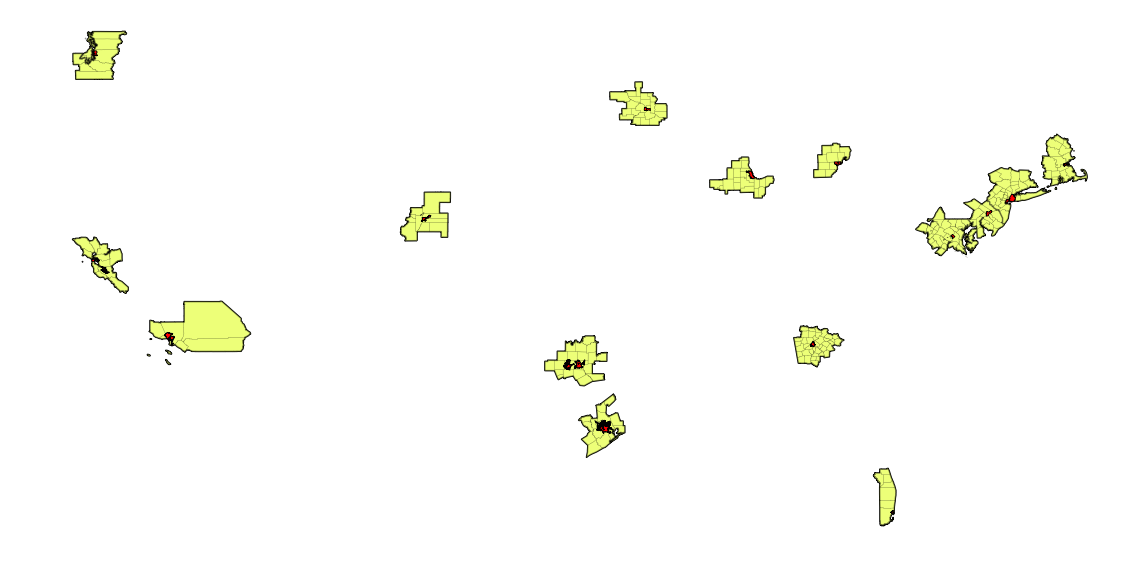

In [302]:
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111)

CSAs.plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=1.5);
Counties.plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=.2, alpha=0.6);
Places.plot(ax=ax, color='r', edgecolor='k',linewidth=.8);

ax.axis('off')

In [303]:
CSAs_sorted = ['500','216','220','378','148',
               '488','176','122','548','408',
               '348','206','288','428','370']

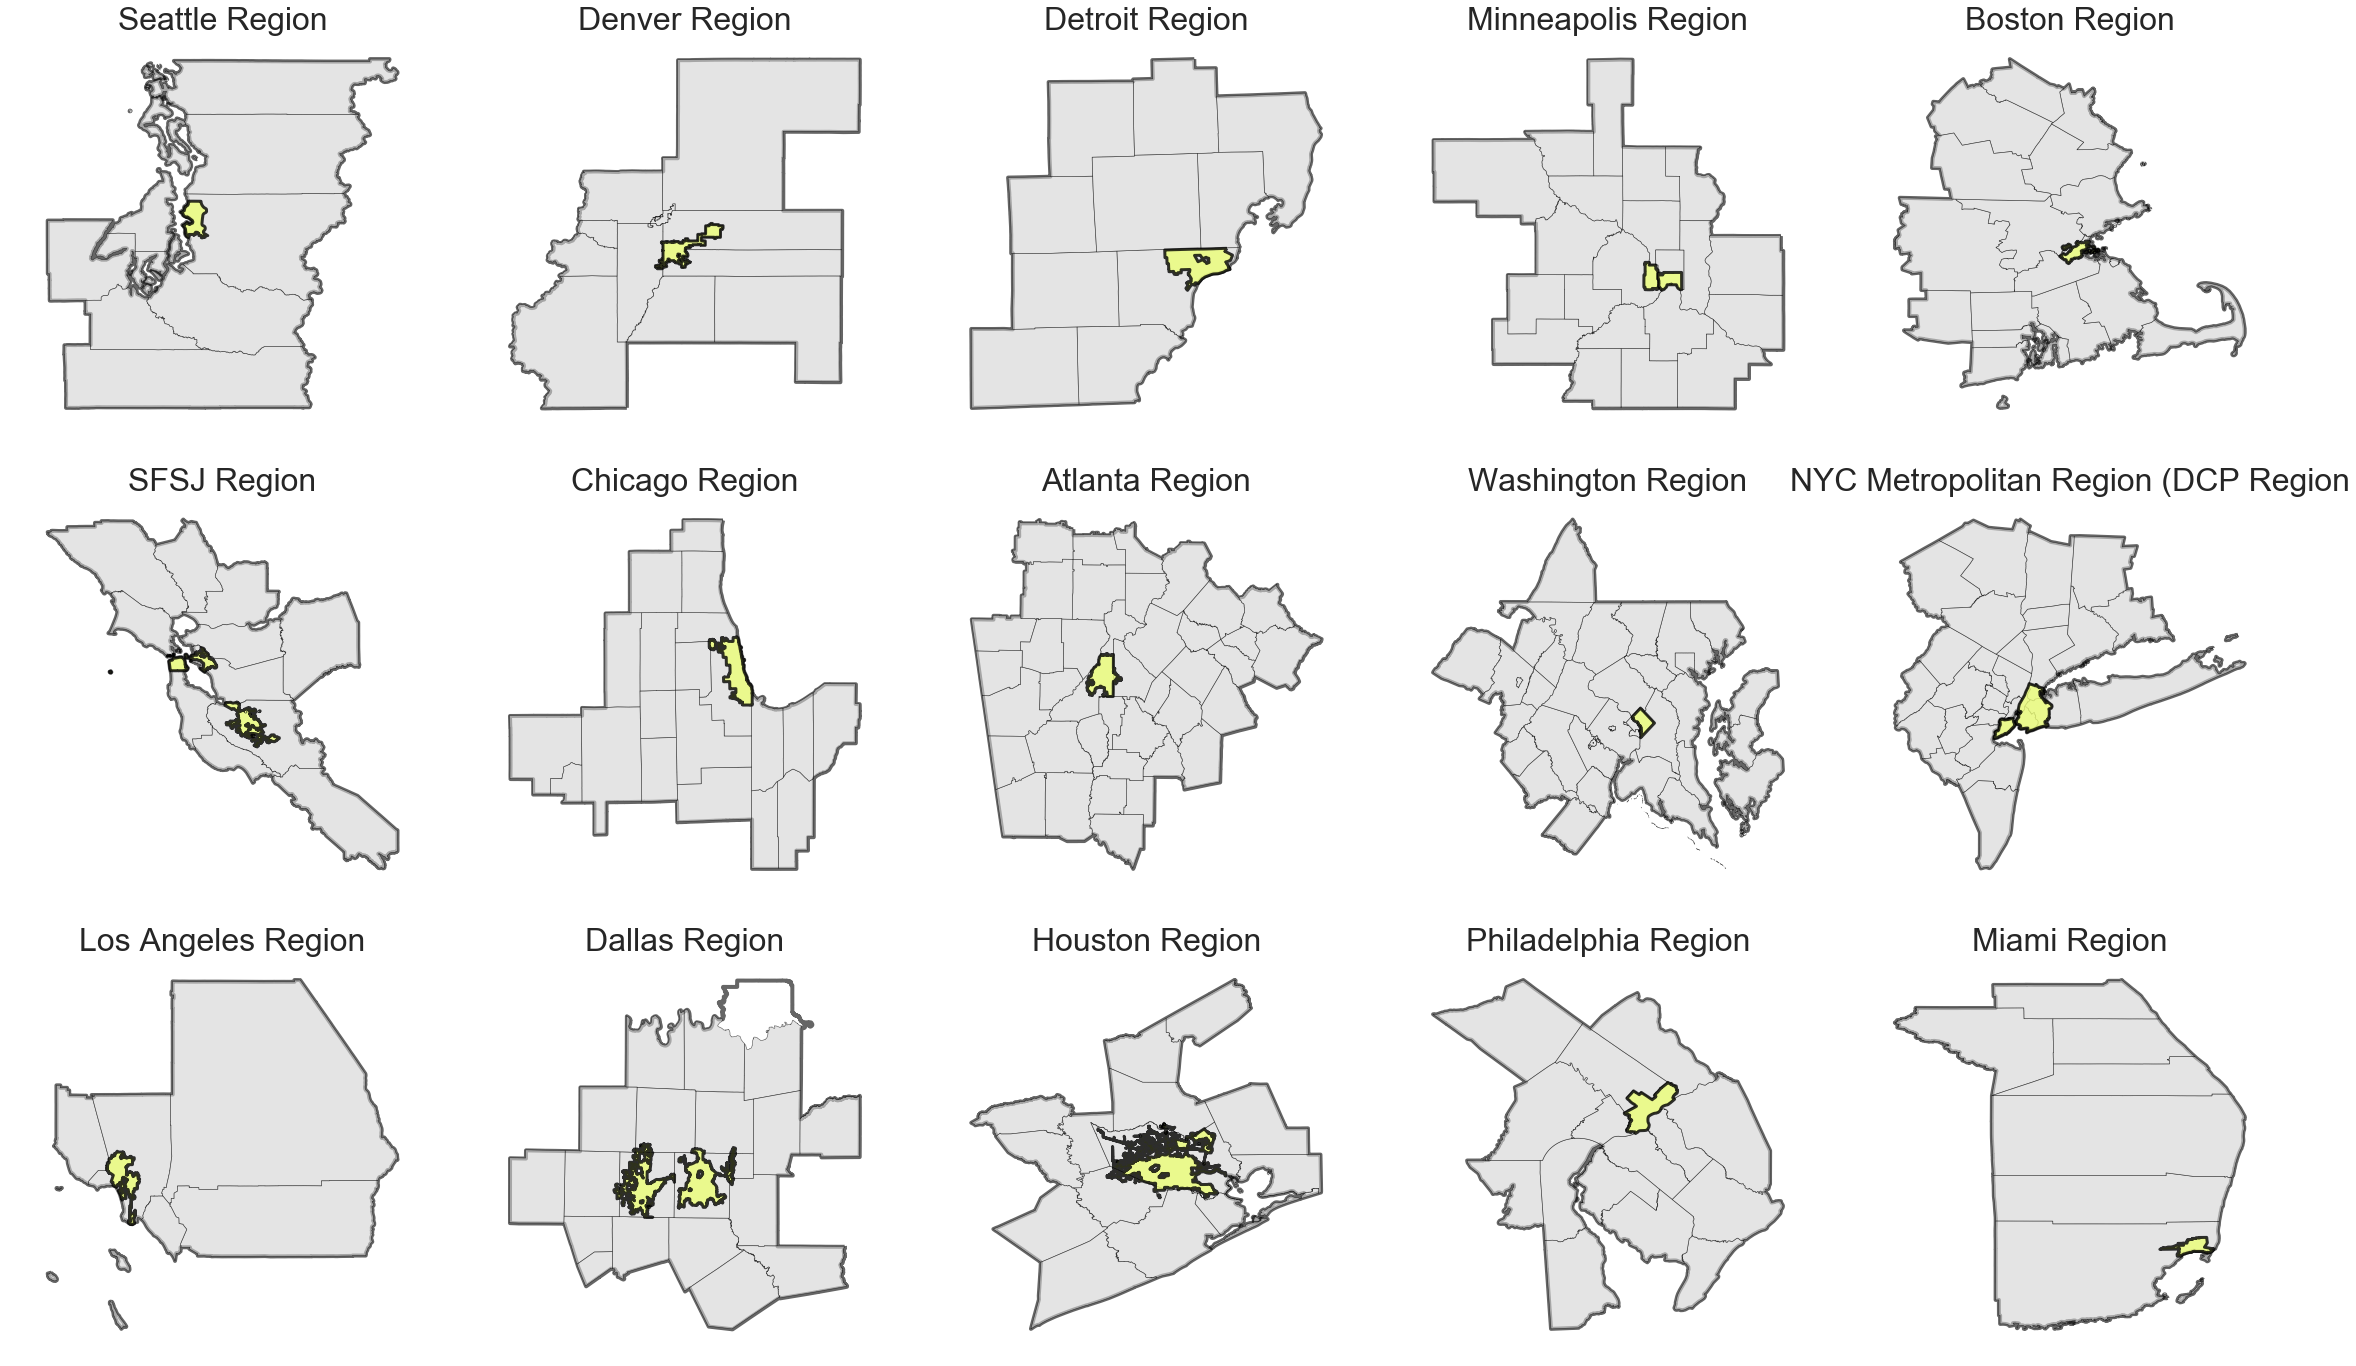

In [304]:
fig = pl.figure(figsize=(40,24))
sns.set_style("whitegrid")
vmin, vmax = 0, 4000

# 15 choroplets of 15 major metros
for k in range(len(CSAs_sorted)):
    ax = fig.add_subplot(3,5,k+1)
    CSAs[CSAs.index == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=4, alpha=0.6);
    Counties[Counties['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='lightgrey', edgecolor='k',linewidth=.6, alpha=0.6);
    Places[Places['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=3, alpha=0.8);

    ax.set_title('{} Region'.format(CSAs['CSA_short'][CSAs_sorted[k]]), fontsize=32, y=1.015)
    ax.grid(linewidth=0.25)
    ax.axis('off')
    
plt.savefig("geographies.pdf", transparent=True)

---
### Tracts

In [305]:
Alltracts = gpd.GeoDataFrame.from_file("data/MM_Tracts_CSA-NYMetro/MM_Tracts_CSA-NYMetro.shp")

print(Alltracts.shape)
Alltracts.head()

(28058, 12)


STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID NAME LSAD  \
0      10      001  041600  1400000US10001041600  10001041600  416   CT   
1      10      003  001300  1400000US10003001300  10003001300   13   CT   
2      10      003  011100  1400000US10003011100  10003011100  111   CT   
3      10      003  011600  1400000US10003011600  10003011600  116   CT   
4      10      003  013200  1400000US10003013200  10003013200  132   CT   

     ALAND  AWATER  CSA  ALAND_mi  \
0  2917742  115233  428   1.12655   
1  2283096    1623  428   0.88151   
2  3057015       0  428   1.18032   
3  1892942       0  428   0.73087   
4  1501029       0  428   0.57955   

                                            geometry  
0  POLYGON ((-75.53657299999999 39.115211, -75.53...  
1  POLYGON ((-75.579956 39.763371, -75.577848 39....  
2  POLYGON ((-75.505088 39.802164, -75.497941 39....  
3  POLYGON ((-75.547082 39.79482, -75.545728 39.7...  
4  POLYGON ((-75.655851 39.73490899999999, -75.65...

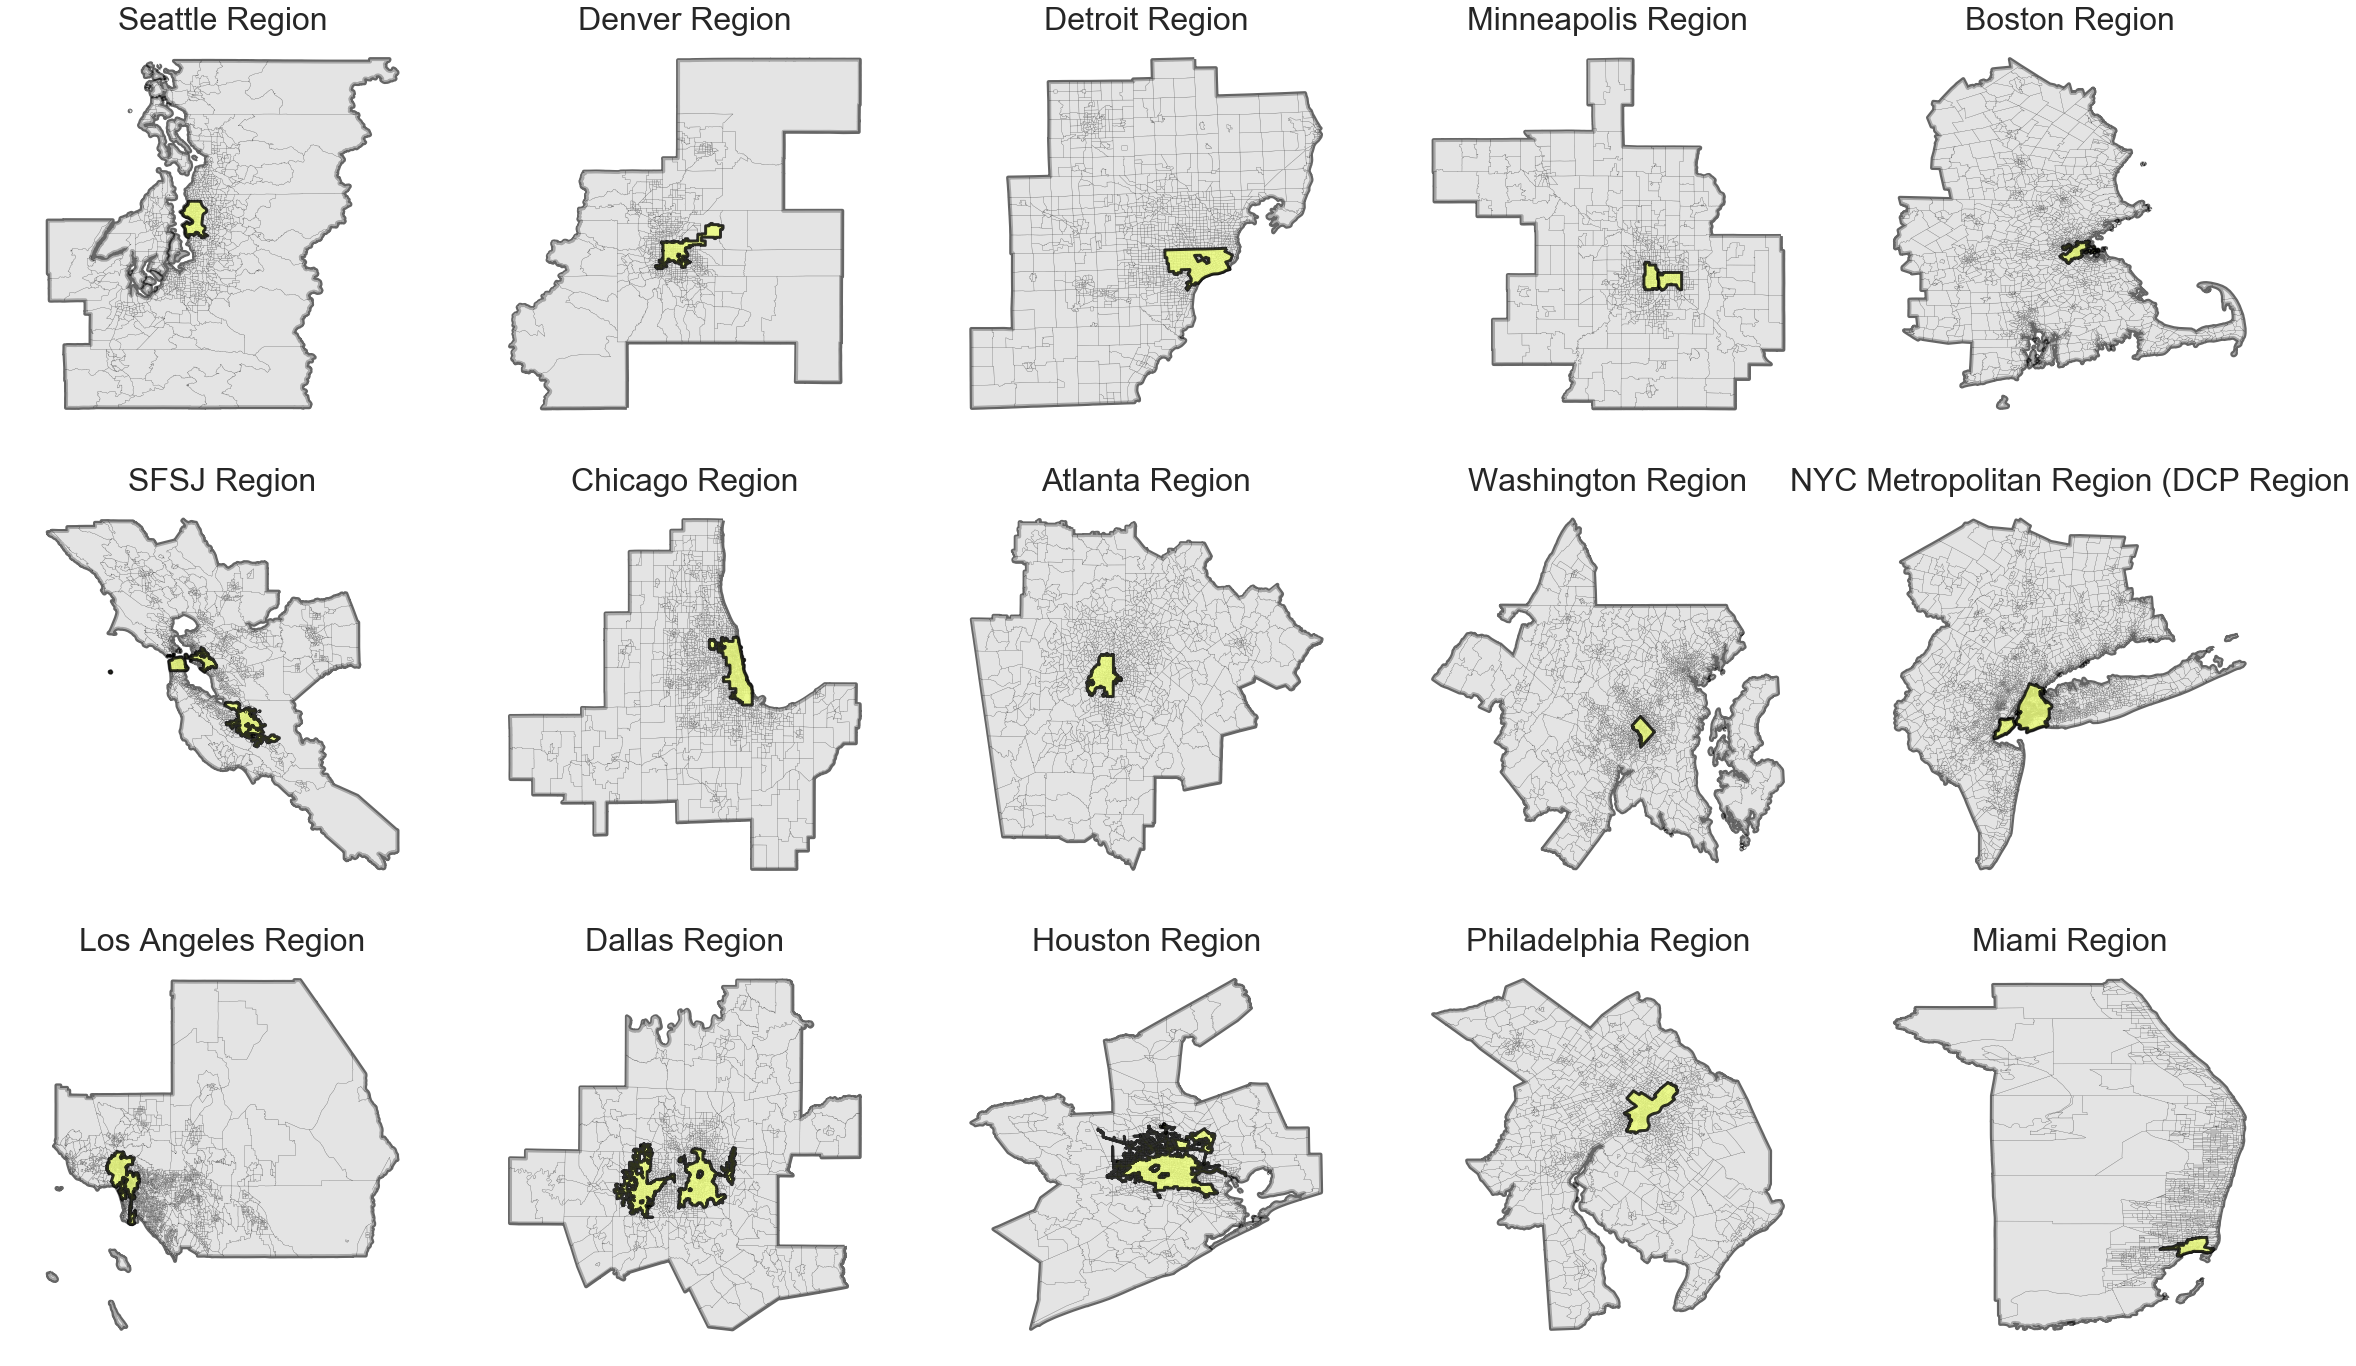

In [306]:
fig = pl.figure(figsize=(40,24))
sns.set_style("whitegrid")
vmin, vmax = 0, 4000

# 15 choroplets of 15 major metros
for k in range(len(CSAs_sorted)):
    ax = fig.add_subplot(3,5,k+1)
    CSAs[CSAs.index == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=4, alpha=0.6);
    Alltracts[Alltracts['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='lightgrey', edgecolor='k',linewidth=.2, alpha=0.6);
    Places[Places['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=3, alpha=0.8);

    ax.set_title('{} Region'.format(CSAs['CSA_short'][CSAs_sorted[k]]), fontsize=32, y=1.015)
    ax.grid(linewidth=0.25)
    ax.axis('off')
    
plt.savefig("tracts.pdf", transparent=True)

## Population Densities

In [307]:
states = list(Alltracts.STATEFP.unique())
print(len(states))
states

24


['10',
 '44',
 '25',
 '09',
 '33',
 '34',
 '42',
 '08',
 '11',
 '12',
 '13',
 '17',
 '18',
 '24',
 '26',
 '27',
 '48',
 '51',
 '53',
 '54',
 '55',
 '06',
 '36',
 '40']

In [308]:
# population 2017
# total POP for all census tracts in the US
POP17tracts = []

for i in states:
    df = pd.read_json('https://api.census.gov/data/2016/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=state:'+str(i))
    df.columns = df.iloc[0]
    df = df[1:]
    POP17tracts.append(df)
    
POP17tracts = pd.concat(POP17tracts)

POP17tracts['state'] = POP17tracts['state'].apply(lambda x: '{0:0>2}'.format(x))
POP17tracts['county'] = POP17tracts['county'].apply(lambda x: '{0:0>3}'.format(x))
POP17tracts['GEOID'] = POP17tracts[['state', 'county', 'tract']].apply(lambda x: ''.join(x), axis=1)

POP17tracts = POP17tracts.rename(columns={'B01001_001E':'pop17'})

print(POP17tracts.shape)
POP17tracts.head()

(50673, 6)


0                                        NAME  pop17 state county   tract  \
1     Census Tract 401, Kent County, Delaware   6498    10    001  040100   
2  Census Tract 402.01, Kent County, Delaware   5143    10    001  040201   
3  Census Tract 402.02, Kent County, Delaware  14552    10    001  040202   
4  Census Tract 402.03, Kent County, Delaware   6019    10    001  040203   
5  Census Tract 405.01, Kent County, Delaware   4424    10    001  040501   

0        GEOID  
1  10001040100  
2  10001040201  
3  10001040202  
4  10001040203  
5  10001040501

In [309]:
POP17tracts.GEOID.dtypes

dtype('O')

### Merge with geo + calculate pop density

In [310]:
CSAtracts = Alltracts.merge(POP17tracts, on='GEOID')
CSAtracts = CSAtracts.drop(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'LSAD'], axis=1)
CSAtracts = CSAtracts.set_index('GEOID')
CSAtracts['pop17'] = CSAtracts['pop17'].astype(int)

CSAtracts['pop_density'] = CSAtracts['pop17'] / CSAtracts['ALAND_mi']
CSAtracts = CSAtracts.drop(['NAME_x','NAME_y'], axis=1)

print(CSAtracts.shape)
print(CSAtracts.dtypes)
CSAtracts.head()

(28058, 10)
ALAND            int64
AWATER           int64
CSA             object
ALAND_mi       float64
geometry        object
pop17            int64
state           object
county          object
tract           object
pop_density    float64
dtype: object


ALAND  AWATER  CSA  ALAND_mi  \
GEOID                                         
10001041600  2917742  115233  428   1.12655   
10003001300  2283096    1623  428   0.88151   
10003011100  3057015       0  428   1.18032   
10003011600  1892942       0  428   0.73087   
10003013200  1501029       0  428   0.57955   

                                                      geometry  pop17 state  \
GEOID                                                                         
10001041600  POLYGON ((-75.53657299999999 39.115211, -75.53...   2060    10   
10003001300  POLYGON ((-75.579956 39.763371, -75.577848 39....   3510    10   
10003011100  POLYGON ((-75.505088 39.802164, -75.497941 39....   2710    10   
10003011600  POLYGON ((-75.547082 39.79482, -75.545728 39.7...   3528    10   
10003013200  POLYGON ((-75.655851 39.73490899999999, -75.65...   2709    10   

            county   tract  pop_density  
GEOID                                    
10001041600    001  041600  1828.591718  
10003001300    003  001300  3981.803950  
10003011100    003  011100  2295.987529  
10003011600    003  011600  4827.123839  
10003013200    003  013200  4674.316280

In [311]:
CSAtracts.to_csv('exports/USMetros_Tracts.csv')

### Densities Categories

In [312]:
CSAtracts['popDens_CAT'] = pd.cut(CSAtracts['pop_density'], bins=5, right=False,
                           labels=["Less than 2,500", "2,500-10,000",
                           "10,000-25,000", "25,000-50,000", "50,000+"],
                            precision=0)

print(CSAtracts.shape)
CSAtracts.head()

(28058, 11)


ALAND  AWATER  CSA  ALAND_mi  \
GEOID                                         
10001041600  2917742  115233  428   1.12655   
10003001300  2283096    1623  428   0.88151   
10003011100  3057015       0  428   1.18032   
10003011600  1892942       0  428   0.73087   
10003013200  1501029       0  428   0.57955   

                                                      geometry  pop17 state  \
GEOID                                                                         
10001041600  POLYGON ((-75.53657299999999 39.115211, -75.53...   2060    10   
10003001300  POLYGON ((-75.579956 39.763371, -75.577848 39....   3510    10   
10003011100  POLYGON ((-75.505088 39.802164, -75.497941 39....   2710    10   
10003011600  POLYGON ((-75.547082 39.79482, -75.545728 39.7...   3528    10   
10003013200  POLYGON ((-75.655851 39.73490899999999, -75.65...   2709    10   

            county   tract  pop_density      popDens_CAT  
GEOID                                                     
10001041600    001  041600  1828.591718  Less than 2,500  
10003001300    003  001300  3981.803950  Less than 2,500  
10003011100    003  011100  2295.987529  Less than 2,500  
10003011600    003  011600  4827.123839  Less than 2,500  
10003013200    003  013200  4674.316280  Less than 2,500

In [313]:
def popDens_CAT(df):
    if df['pop_density'] <= 2500:
        val = 'Less than 2,500'
    elif df['pop_density'] > 2500 and df['pop_density'] <= 10000:
        val = '2,500-10,000'
    elif df['pop_density'] > 10000 and df['pop_density'] <= 25000:
        val = '10,000-25,000'
    elif df['pop_density'] > 25000 and df['pop_density'] <= 50000:
        val = '25,000-50,000'   
    else:
        val = '50,000+'
    return val

In [314]:
CSAtracts['popDens_CAT'] = CSAtracts.apply(popDens_CAT, axis=1)

print(CSAtracts.shape)
print(CSAtracts['popDens_CAT'].value_counts())
CSAtracts.head()

(28058, 11)
2,500-10,000       12163
Less than 2,500     8596
10,000-25,000       4512
25,000-50,000       1670
50,000+             1117
Name: popDens_CAT, dtype: int64


ALAND  AWATER  CSA  ALAND_mi  \
GEOID                                         
10001041600  2917742  115233  428   1.12655   
10003001300  2283096    1623  428   0.88151   
10003011100  3057015       0  428   1.18032   
10003011600  1892942       0  428   0.73087   
10003013200  1501029       0  428   0.57955   

                                                      geometry  pop17 state  \
GEOID                                                                         
10001041600  POLYGON ((-75.53657299999999 39.115211, -75.53...   2060    10   
10003001300  POLYGON ((-75.579956 39.763371, -75.577848 39....   3510    10   
10003011100  POLYGON ((-75.505088 39.802164, -75.497941 39....   2710    10   
10003011600  POLYGON ((-75.547082 39.79482, -75.545728 39.7...   3528    10   
10003013200  POLYGON ((-75.655851 39.73490899999999, -75.65...   2709    10   

            county   tract  pop_density      popDens_CAT  
GEOID                                                     
10001041600    001  041600  1828.591718  Less than 2,500  
10003001300    003  001300  3981.803950     2,500-10,000  
10003011100    003  011100  2295.987529  Less than 2,500  
10003011600    003  011600  4827.123839     2,500-10,000  
10003013200    003  013200  4674.316280     2,500-10,000

### Calculate how much area are in each pop_density category for each CSA

In [315]:
CSA_densities = CSAtracts[['CSA','ALAND_mi','popDens_CAT']]#.set_index('CSA')
CSA_densities.head()

CSA  ALAND_mi      popDens_CAT
GEOID                                      
10001041600  428   1.12655  Less than 2,500
10003001300  428   0.88151     2,500-10,000
10003011100  428   1.18032  Less than 2,500
10003011600  428   0.73087     2,500-10,000
10003013200  428   0.57955     2,500-10,000

In [316]:
CSA_densities.popDens_CAT.unique()

array(['Less than 2,500', '2,500-10,000', '10,000-25,000',
       '25,000-50,000', '50,000+'], dtype=object)

In [317]:
CSA_densities_CAT = pd.pivot_table(CSA_densities, values='ALAND_mi',
                    index='CSA',columns='popDens_CAT', 
                    aggfunc='sum', fill_value=0)

CSA_densities_CAT

popDens_CAT  10,000-25,000  2,500-10,000  25,000-50,000   50,000+  \
CSA                                                                 
122                6.16465     547.08267        0.00000   0.00000   
148               83.37458     544.38653       10.71061   1.21369   
176              123.08172     931.80595       20.88761   1.60568   
206               24.35160     939.06762        0.60651   0.00000   
216               17.93299     437.28805        0.26259   0.00000   
220                9.42626     687.67566        0.00000   0.00000   
288               31.09118     828.03362        0.28636   0.06226   
348              424.01690    1543.78085       34.27463   1.81114   
370               82.66418     802.96469        5.27100   0.14382   
378               15.49640     412.00463        0.20895   0.00000   
408              225.71355    1372.04221       80.64486  61.90722   
428               70.99849     582.19581       15.66831   0.54794   
488              150.51969     735.31052       15.38197   1.56926   
500               22.69707     550.44959        1.31052   0.19640   
548               84.23784    1001.74592        8.78281   0.64989   

popDens_CAT  Less than 2,500  
CSA                           
122              11291.82676  
148               9061.68381  
176               9557.90746  
206              15520.85395  
216              12602.66312  
220               5834.12866  
288              11667.26402  
348              31951.83736  
370               6565.66865  
378              10704.45940  
408              10830.87442  
428               6666.79016  
488               9230.87782  
500              11713.46054  
548              11534.76700

In [318]:
pd.pivot_table?

In [319]:
CSA_densities_CAT.iloc[:1,:].values[0]

array([6.16465000e+00, 5.47082670e+02, 0.00000000e+00, 0.00000000e+00,
       1.12918268e+04])

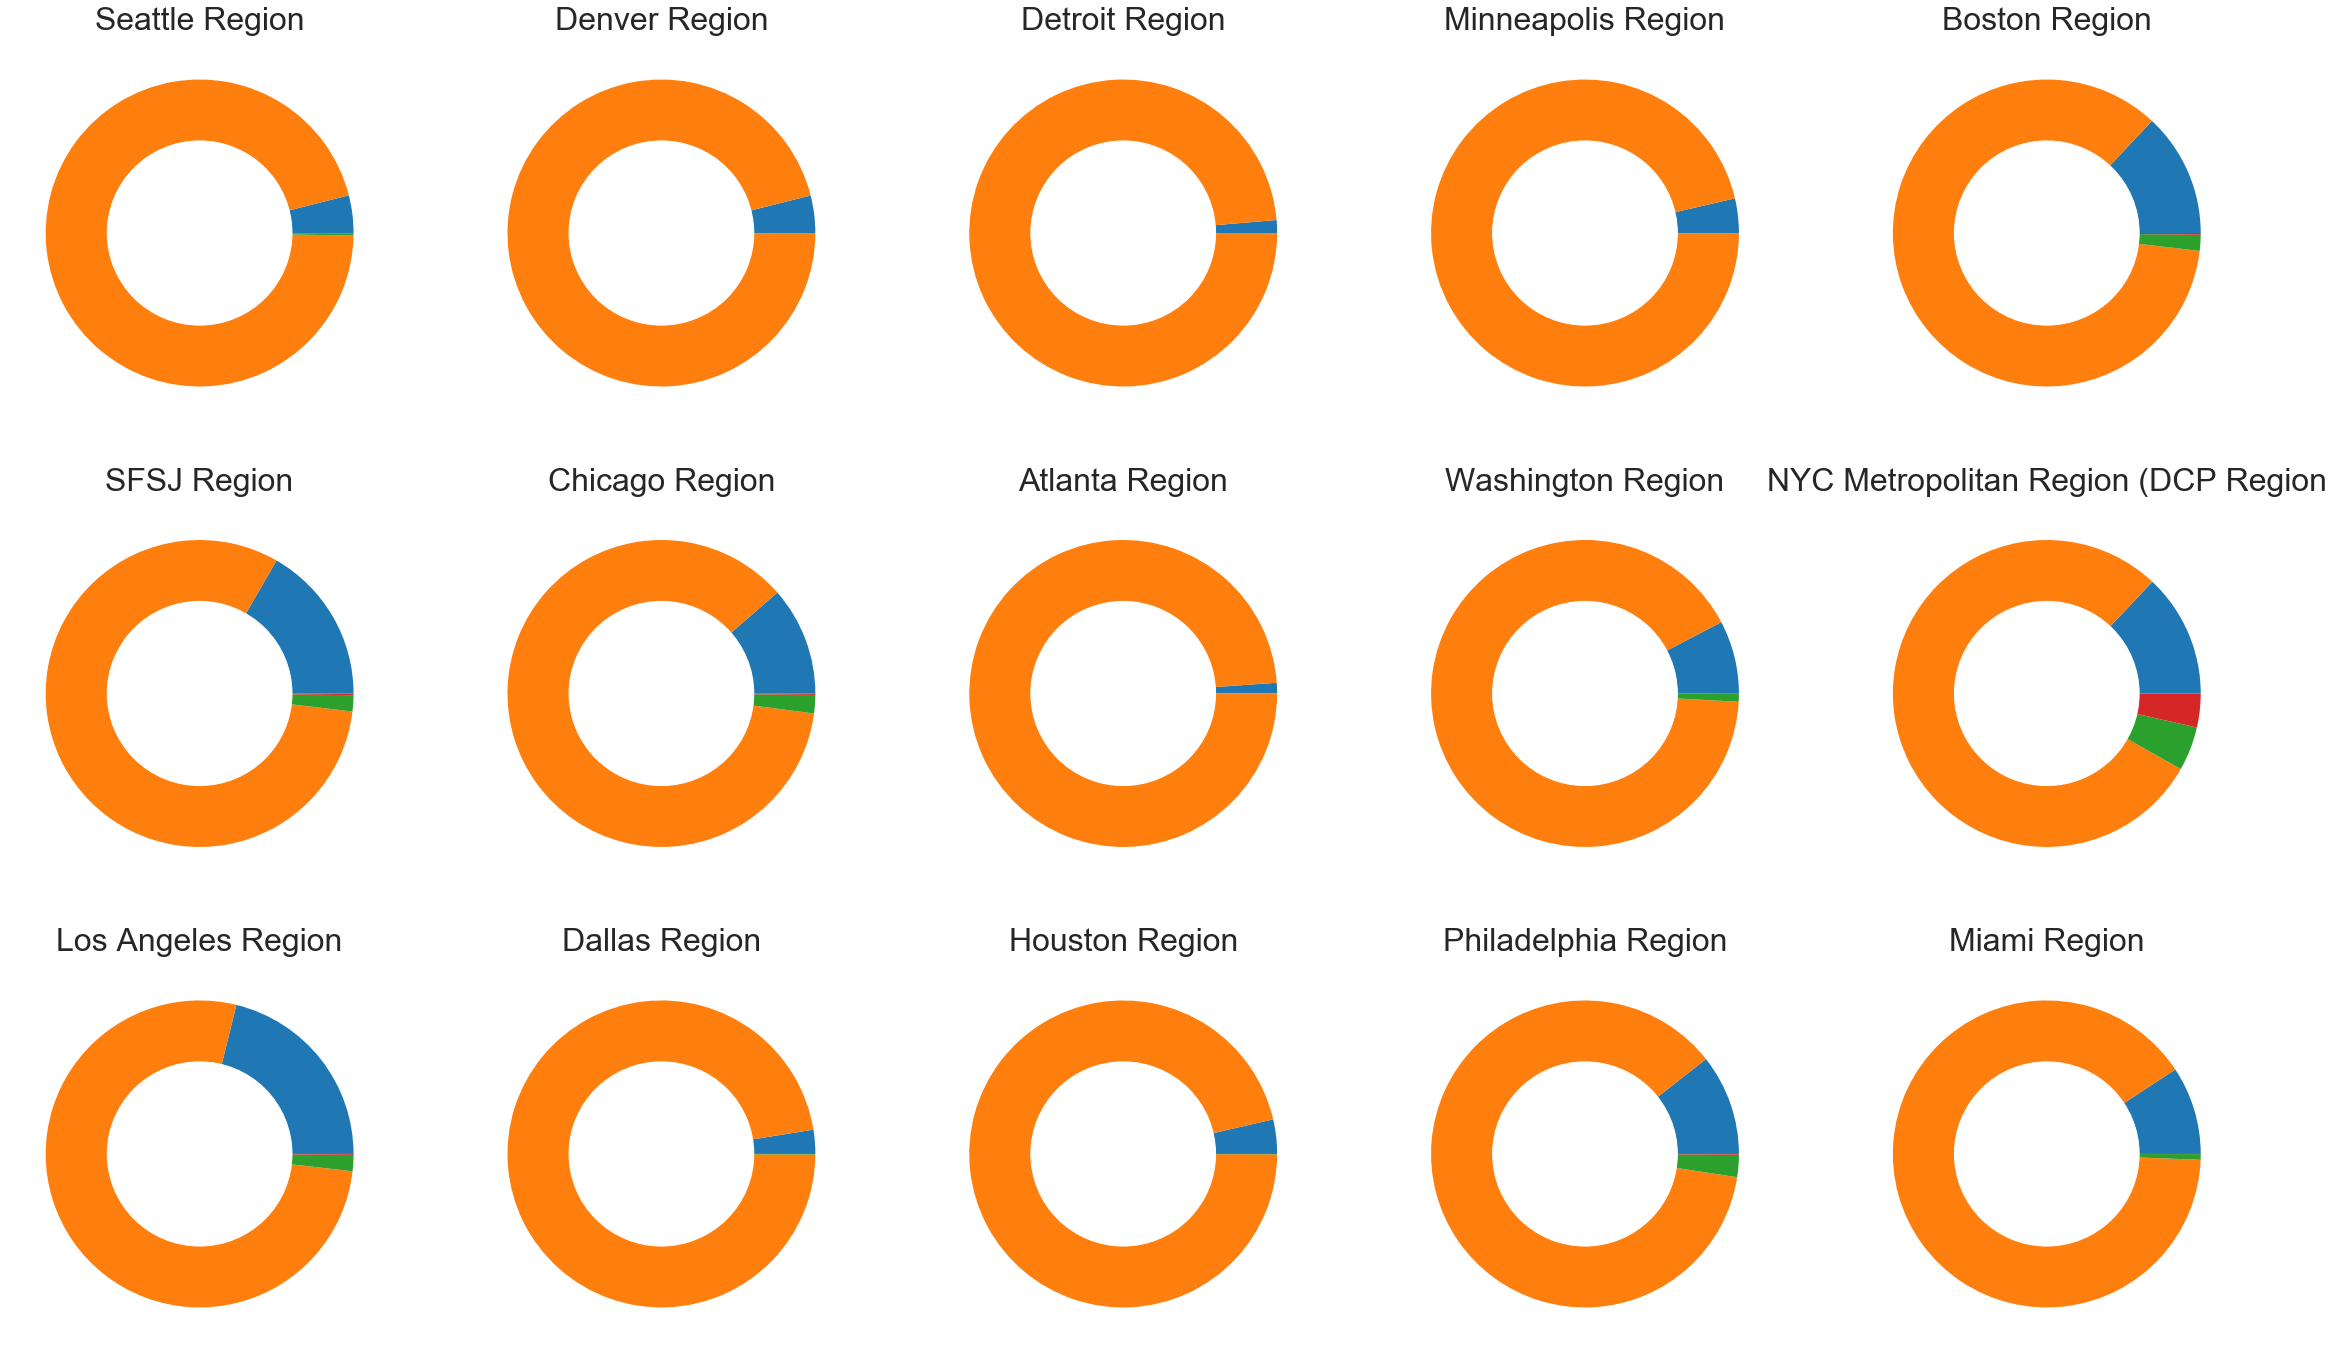

In [334]:
fig = pl.figure(figsize=(40,24))
sns.set_style("whitegrid")
vmin, vmax = 0, 4000

# 15 choroplets of 15 major metros
for k in range(len(CSAs_sorted)):
    ax = fig.add_subplot(3,5,k+1)
    pl.pie(CSA_densities_CAT[CSA_densities_CAT.index == CSAs_sorted[k]].iloc[:,:-1].values[0])
    my_circle=pl.Circle( (0,0), 0.6, color='white')
    p=pl.gcf()
    p.gca().add_artist(my_circle)

#     CSAs[CSAs.index == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=4, alpha=0.6);
#     Alltracts[Alltracts['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='lightgrey', edgecolor='k',linewidth=.2, alpha=0.6);
#     Places[Places['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=3, alpha=0.8);

    ax.set_title('{} Region'.format(CSAs['CSA_short'][CSAs_sorted[k]]), fontsize=32, y=1.015)
    ax.grid(linewidth=0.25)
    ax.axis('off')
    
plt.savefig("densities_donut.pdf", transparent=True)

### Plot densities

/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


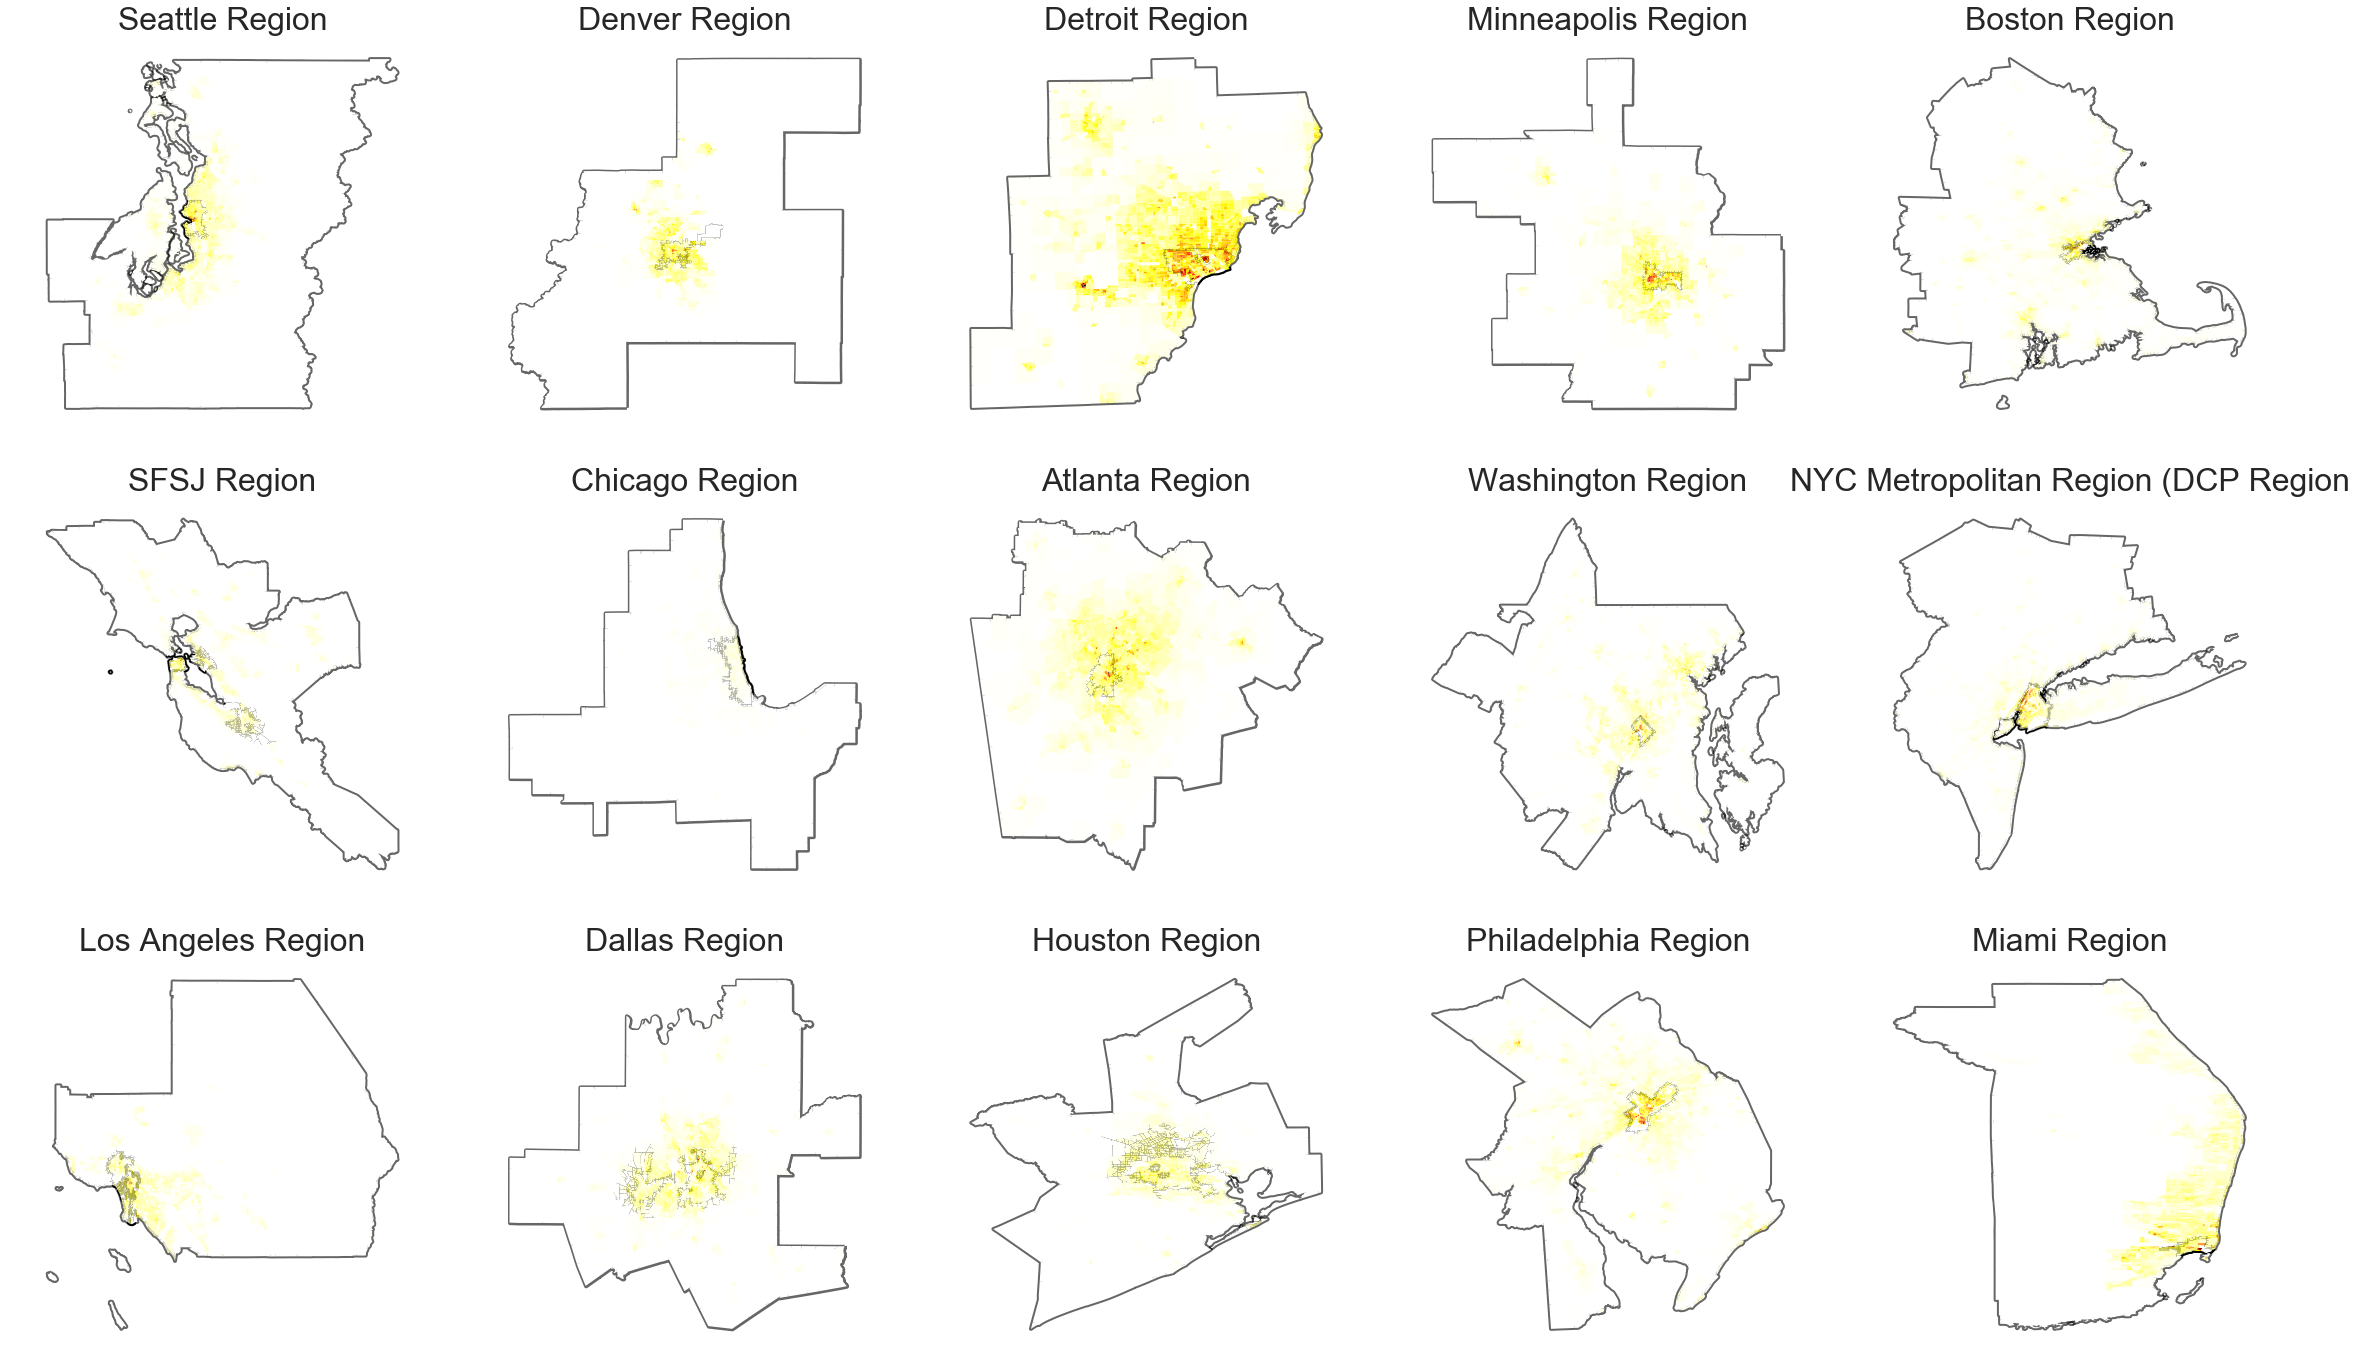

In [340]:
from pysal.esda.mapclassify import (Quantiles, Equal_Interval, Fisher_Jenks)

fig = pl.figure(figsize=(40,24))
sns.set_style("whitegrid")
vmin, vmax = 0, 4000

# 15 choroplets of 15 major metros
for k in range(len(CSAs_sorted)):
    ax = fig.add_subplot(3,5,k+1)
    CSAs[CSAs.index == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=4, alpha=0.6);
    Places[Places['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=3);
    CSAtracts[CSAtracts['CSA'] == CSAs_sorted[k]].plot(ax=ax, column='pop_density',cmap='hot_r');
    ax.set_title('{} Region'.format(CSAs['CSA_short'][CSAs_sorted[k]]), fontsize=32, y=1.015)
    ax.grid(linewidth=0.25)
    ax.legend()
    ax.axis('off')
    
plt.savefig("popDens17.pdf", transparent=True)

In [344]:
CSAtracts[CSAtracts['CSA'] == '370']['popDens_CAT'].value_counts()

2,500-10,000       819
Less than 2,500    257
10,000-25,000      217
25,000-50,000       38
50,000+              6
Name: popDens_CAT, dtype: int64

### Reducing dataset to include only 2,500+ pop density

In [347]:
CSAtracts_Dens = CSAtracts[CSAtracts['popDens_CAT'] != 'Less than 2,500']

print(CSAtracts.shape)
print(CSAtracts_Dens.shape)

CSAtracts_Dens.head(3)

(28058, 11)
(19462, 11)


ALAND  AWATER  CSA  ALAND_mi  \
GEOID                                         
10003001300  2283096    1623  428   0.88151   
10003011600  1892942       0  428   0.73087   
10003013200  1501029       0  428   0.57955   

                                                      geometry  pop17 state  \
GEOID                                                                         
10003001300  POLYGON ((-75.579956 39.763371, -75.577848 39....   3510    10   
10003011600  POLYGON ((-75.547082 39.79482, -75.545728 39.7...   3528    10   
10003013200  POLYGON ((-75.655851 39.73490899999999, -75.65...   2709    10   

            county   tract  pop_density   popDens_CAT  
GEOID                                                  
10003001300    003  001300  3981.803950  2,500-10,000  
10003011600    003  011600  4827.123839  2,500-10,000  
10003013200    003  013200  4674.316280  2,500-10,000

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


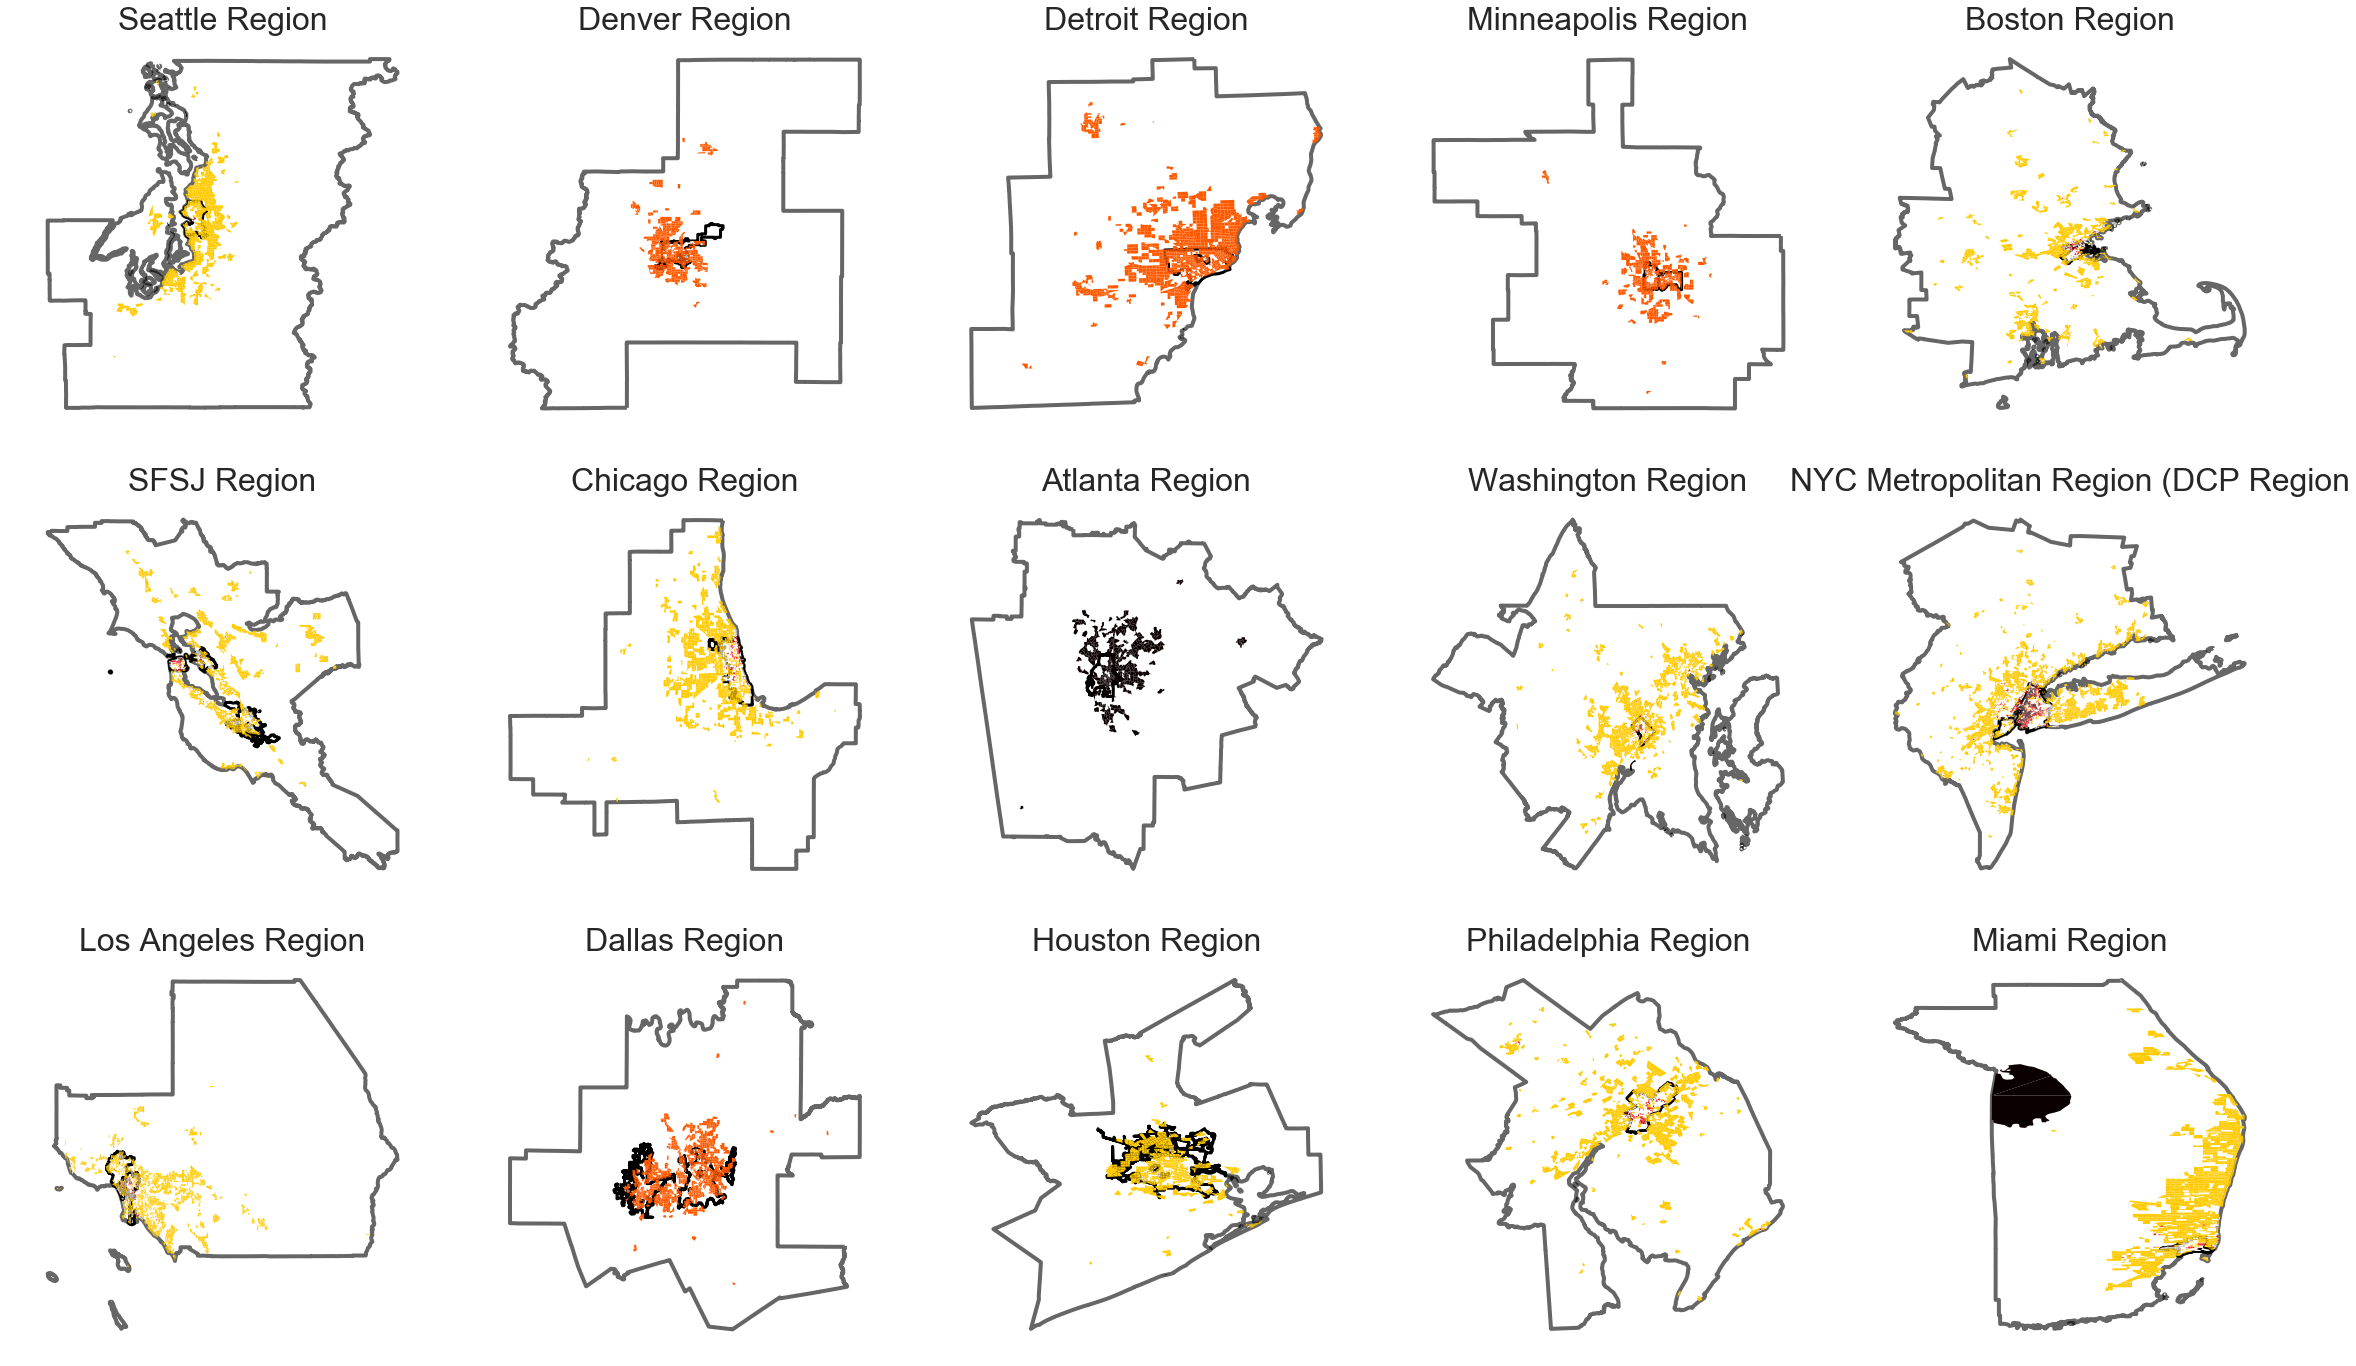

In [349]:
fig = pl.figure(figsize=(40,24))
sns.set_style("whitegrid")
vmin, vmax = 0, 4000

# 15 choroplets of 15 major metros
for k in range(len(CSAs_sorted)):
    ax = fig.add_subplot(3,5,k+1)
    CSAs[CSAs.index == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=4, alpha=0.6);
    Places[Places['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=3);
    CSAtracts_Dens[CSAtracts_Dens['CSA'] == CSAs_sorted[k]].plot(ax=ax, column='popDens_CAT',cmap='hot_r');
    ax.set_title('{} Region'.format(CSAs['CSA_short'][CSAs_sorted[k]]), fontsize=32, y=1.015)
    ax.grid(linewidth=0.25)
    ax.legend()
    ax.axis('off')
    
plt.savefig("popDens17.pdf", transparent=True)